In [6]:
import os
import re
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # For color mapping
import numpy as np

In [7]:
# Function to extract metrics from the last line of the train.txt file
def extract_metrics(file_path):
    with open(file_path, 'r') as file:
        last_line = file.readlines()[-1].strip()
    
    # Use regex to extract PSNR and MS-SSIM values
    psnr_match = re.search(r'PSNR:([0-9]+\.[0-9]+)', last_line)
    msssim_match = re.search(r'MS-SSIM:([0-9]+\.[0-9]+)', last_line)
    
    psnr = float(psnr_match.group(1)) if psnr_match else None
    msssim = float(msssim_match.group(1)) if msssim_match else None
    return psnr, msssim

In [8]:
def gather_data(base_path):
    target_gaussian_numbers = {10000, 20000, 30000, 40000, 50000}
    target_Iteration_numbers = {10000, 20000, 30000, 40000, 50000}
    gaussian_numbers = []
    Iteration_numbers=[]
    psnr_values = []
    msssim_values = []
    
    # Iterate through each folder in the base path
    for folder_name in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder_name)
        if os.path.isdir(folder_path):
            try:
                # Extract the Gaussian number from the folder name
                gaussian_number = int(folder_name.split('_')[-1])
                Iteration_numebr = int(folder_name.split('_')[-2])
                # Only process if the Gaussian number is in the target list
                if (gaussian_number in target_gaussian_numbers) and (Iteration_numebr in target_Iteration_numbers):
                    train_file = os.path.join(folder_path, 'train.txt')

                    if os.path.exists(train_file):
                        psnr, msssim = extract_metrics(train_file)
                        gaussian_numbers.append(gaussian_number)
                        Iteration_numbers.append(Iteration_numebr)
                        psnr_values.append(psnr)
                        msssim_values.append(msssim)
            except Exception as e:
                print(f"Error processing folder {folder_name}: {e}")

    return Iteration_numbers,gaussian_numbers, psnr_values, msssim_values

In [9]:
def plot_all_data(all_data, save_directory):
    for video_folder, data in all_data.items():
        iteration_numbers = data['Iteration_numbers']
        gaussian_numbers = data['gaussian_numbers']
        psnr_values = data['psnr_values']
        msssim_values = data['msssim_values']
        
        fig = plt.figure(figsize=(20, 14))  # 增大图像尺寸以适应3D图

        # 获取唯一的Gaussian numbers和Iteration numbers
        unique_gaussian = sorted(set(gaussian_numbers))
        unique_iterations = sorted(set(iteration_numbers))
        
        # Determine the ranges for the bars
        interval=10000
        
        # Normalize the PSNR and MSSSIM values for color mapping
        norm_psnr = (psnr_values - np.min(psnr_values)) / (np.max(psnr_values) - np.min(psnr_values))
        norm_msssim = (msssim_values - np.min(msssim_values)) / (np.max(msssim_values) - np.min(msssim_values))

        # Plot iteration number vs psnr_values
        ax1 = fig.add_subplot(2, 3, 1)
        for gaussian in unique_gaussian:
            idx = [i for i, g in enumerate(gaussian_numbers) if g == gaussian]
            ax1.plot([iteration_numbers[i] for i in idx], [psnr_values[i] for i in idx], marker='o', label=f'Gaussian {gaussian}')
        ax1.set_title(f'{video_folder}: Iteration Number vs PSNR')
        ax1.set_xlabel('Iteration Number')
        ax1.set_ylabel('PSNR')
        ax1.legend(title="Gaussian Number", loc='lower right')  # 设置图例在图像外右侧
        ax1.grid(True)
        ax1.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval

        # Plot iteration number vs msssim_values
        ax2 = fig.add_subplot(2, 3, 2)
        for gaussian in unique_gaussian:
            idx = [i for i, g in enumerate(gaussian_numbers) if g == gaussian]
            ax2.plot([iteration_numbers[i] for i in idx], [msssim_values[i] for i in idx], marker='o', label=f'Gaussian {gaussian}')
        ax2.set_title(f'{video_folder}: Iteration Number vs MSSSIM')
        ax2.set_xlabel('Iteration Number')
        ax2.set_ylabel('MSSSIM')
        ax2.legend(title="Gaussian Number", loc='lower right')  # 设置图例在图像外右侧
        ax2.grid(True)
        ax2.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval

        # Plot gaussian number vs psnr_values
        ax3 = fig.add_subplot(2, 3, 3)
        for iteration in unique_iterations:
            idx = [i for i, it in enumerate(iteration_numbers) if it == iteration]
            ax3.plot([gaussian_numbers[i] for i in idx], [psnr_values[i] for i in idx], marker='o', label=f'Iteration {iteration}')
        ax3.set_title(f'{video_folder}: Gaussian Number vs PSNR')
        ax3.set_xlabel('Gaussian Number')
        ax3.set_ylabel('PSNR')
        ax3.legend(title="Iteration Number", loc='lower right')  # 设置图例在图像外右侧
        ax3.grid(True)
        ax3.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval

        # Plot gaussian number vs msssim_values
        ax4 = fig.add_subplot(2, 3, 4)
        for iteration in unique_iterations:
            idx = [i for i, it in enumerate(iteration_numbers) if it == iteration]
            ax4.plot([gaussian_numbers[i] for i in idx], [msssim_values[i] for i in idx], marker='o', label=f'Iteration {iteration}')
        ax4.set_title(f'{video_folder}: Gaussian Number vs MSSSIM')
        ax4.set_xlabel('Gaussian Number')
        ax4.set_ylabel('MSSSIM')
        ax4.legend(title="Iteration Number", loc='lower right')  # 设置图例在图像外右侧
        ax4.grid(True)
        ax4.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval

        # 3D Bar Plot: Gaussian vs Iteration vs MSSSIM
        ax5 = fig.add_subplot(2, 3, 5, projection='3d')
        for i in range(len(msssim_values)):
            color = cm.viridis(norm_msssim[i])  # Using a colormap for dynamic coloring
            ax5.bar3d(gaussian_numbers[i], iteration_numbers[i], 0, interval, interval, msssim_values[i], shade=True, color=color)
        ax5.set_title(f'{video_folder}: Gaussian vs Iteration vs MSSSIM')
        ax5.set_xlabel('Gaussian Number')
        ax5.set_ylabel('Iteration Number')
        ax5.set_zlabel('MSSSIM')
        ax5.grid(True)
        ax5.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval
        ax5.set_yticks(range(interval, max(iteration_numbers)+interval, interval))  # 设置y轴间隔为变量interval

        # 3D Bar Plot: Gaussian vs Iteration vs PSNR
        ax6 = fig.add_subplot(2, 3, 6, projection='3d')
        for i in range(len(psnr_values)):
            color = cm.viridis(norm_psnr[i])  # Using a colormap for dynamic coloring
            ax6.bar3d(gaussian_numbers[i], iteration_numbers[i], 0, interval, interval, psnr_values[i], shade=True, color=color)
        ax6.set_title(f'{video_folder}: Gaussian vs Iteration vs PSNR')
        ax6.set_xlabel('Gaussian Number')
        ax6.set_ylabel('Iteration Number')
        ax6.set_zlabel('PSNR')
        ax6.grid(True)
        ax6.set_xticks(range(interval, max(gaussian_numbers)+interval, interval))  # 设置x轴间隔为变量interval
        ax6.set_yticks(range(interval, max(iteration_numbers)+interval, interval))  # 设置y轴间隔为变量interval

        plt.tight_layout()

        # Save the figure
        save_path = os.path.join(save_directory, f'{video_folder}_graphs.png')
        
        plt.savefig(save_path, format='png', dpi=300)
        plt.show()
        plt.close()


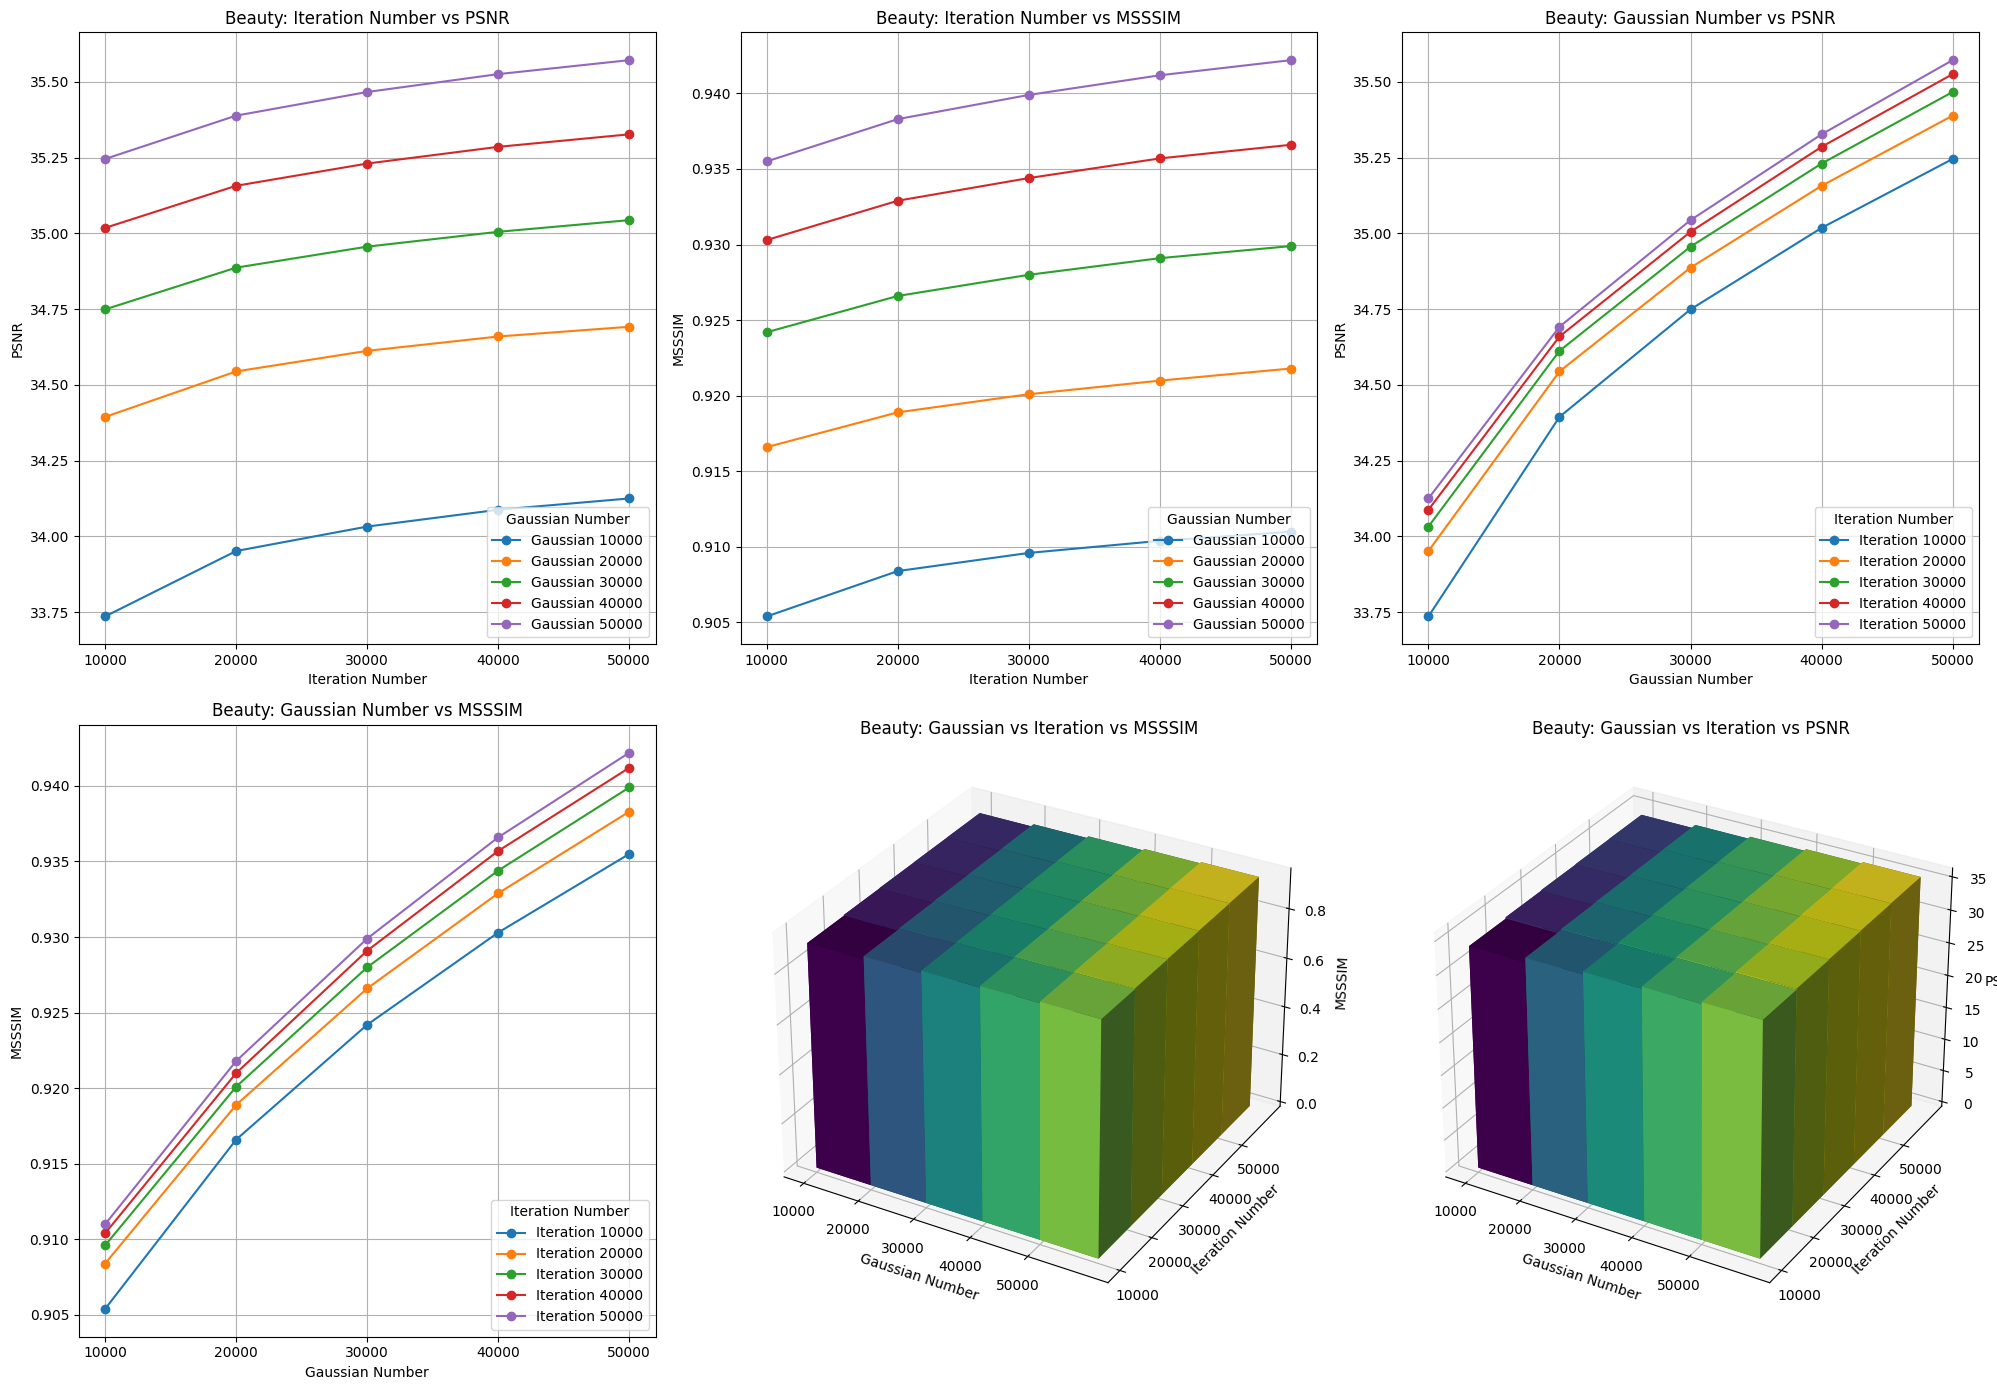

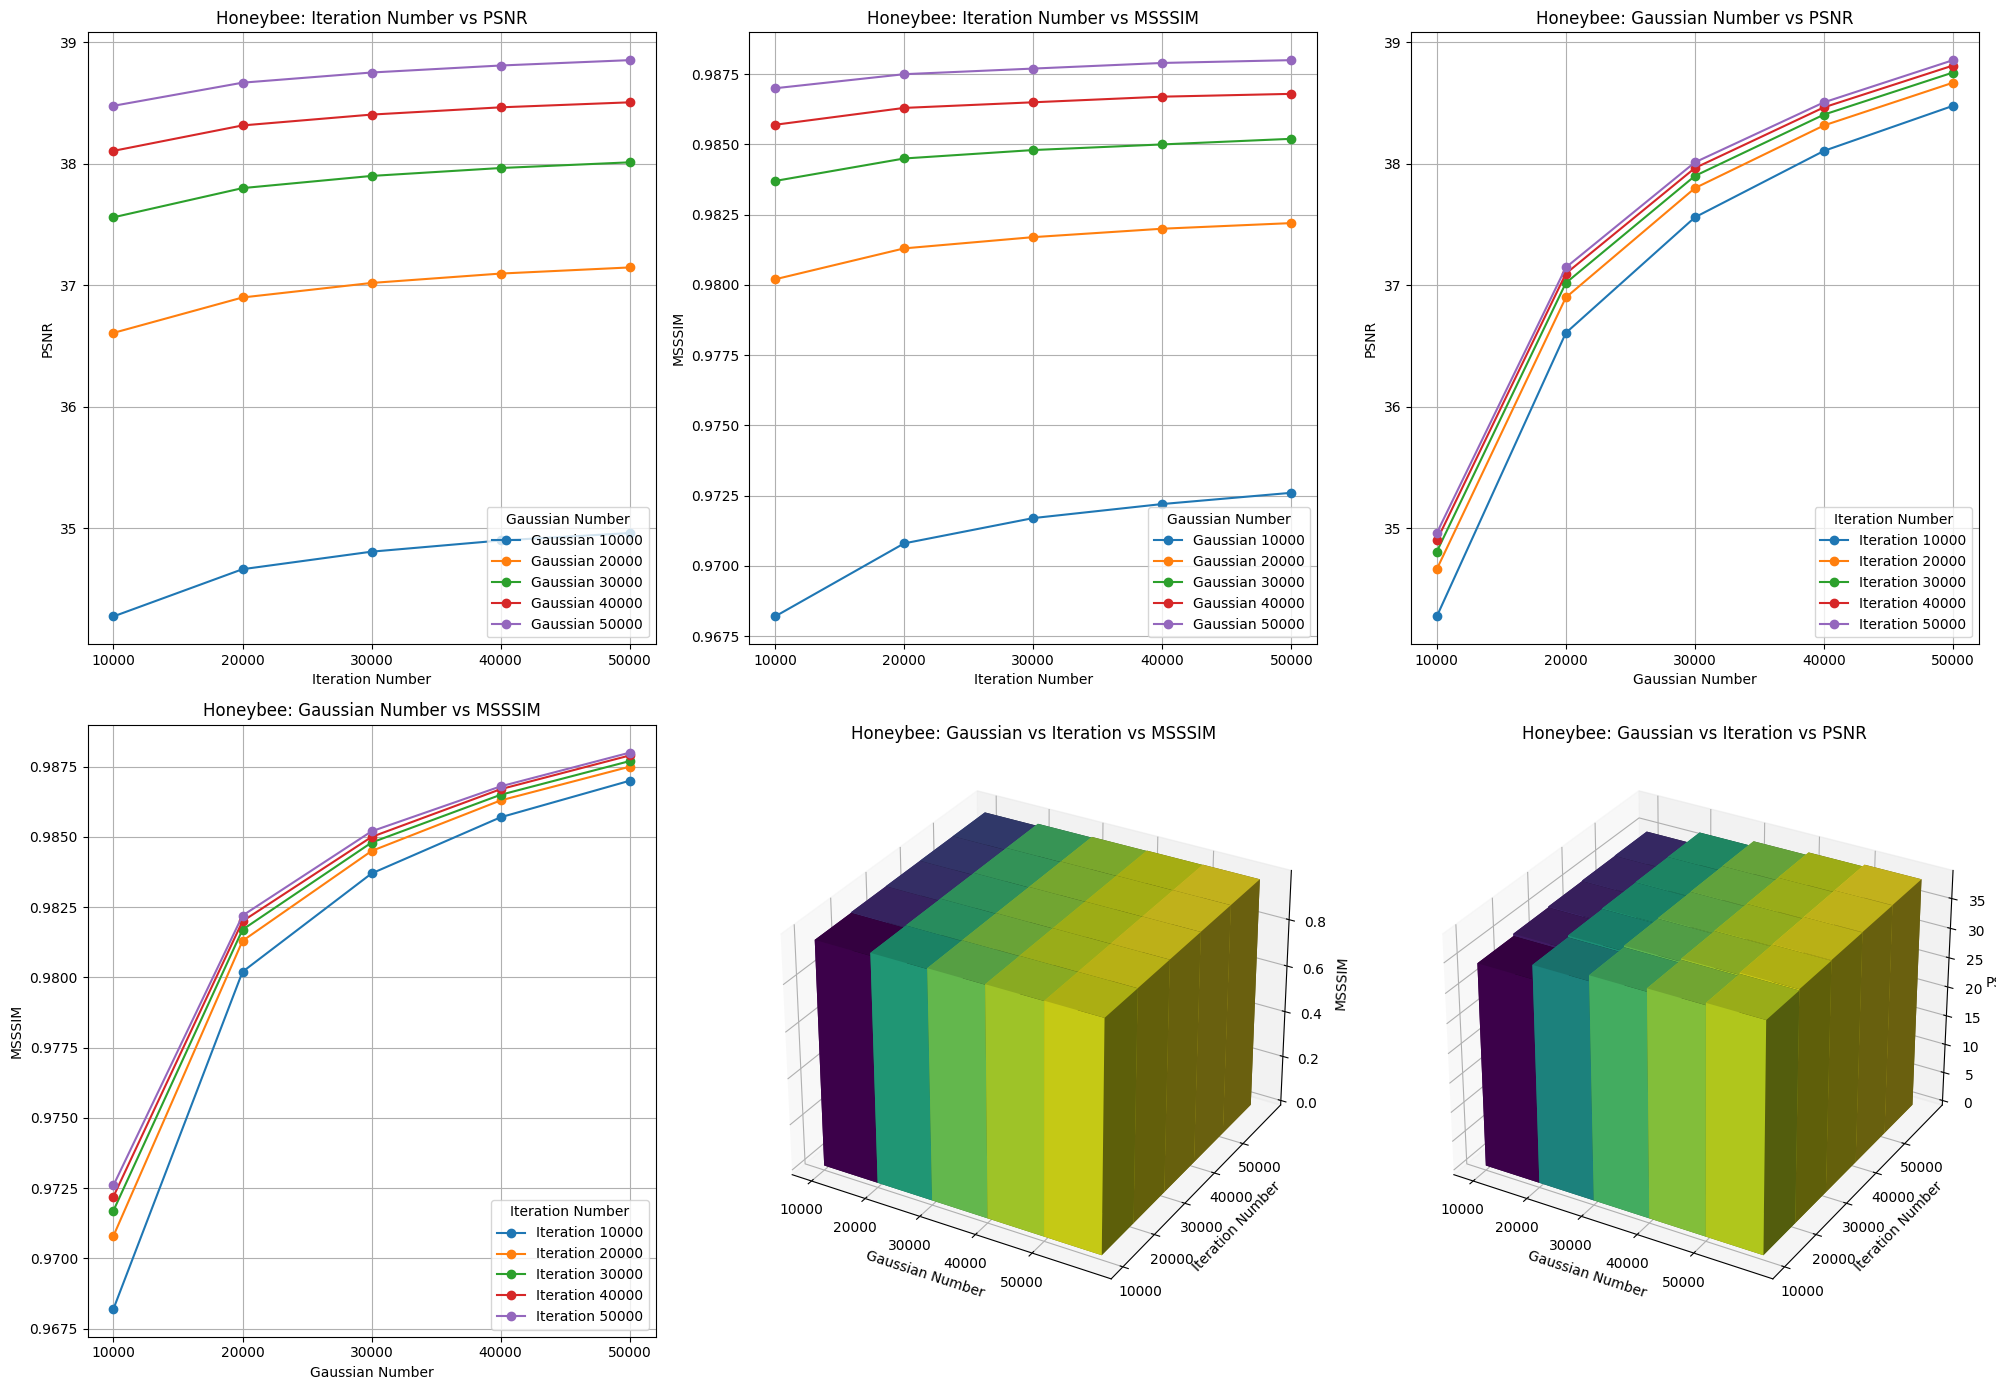

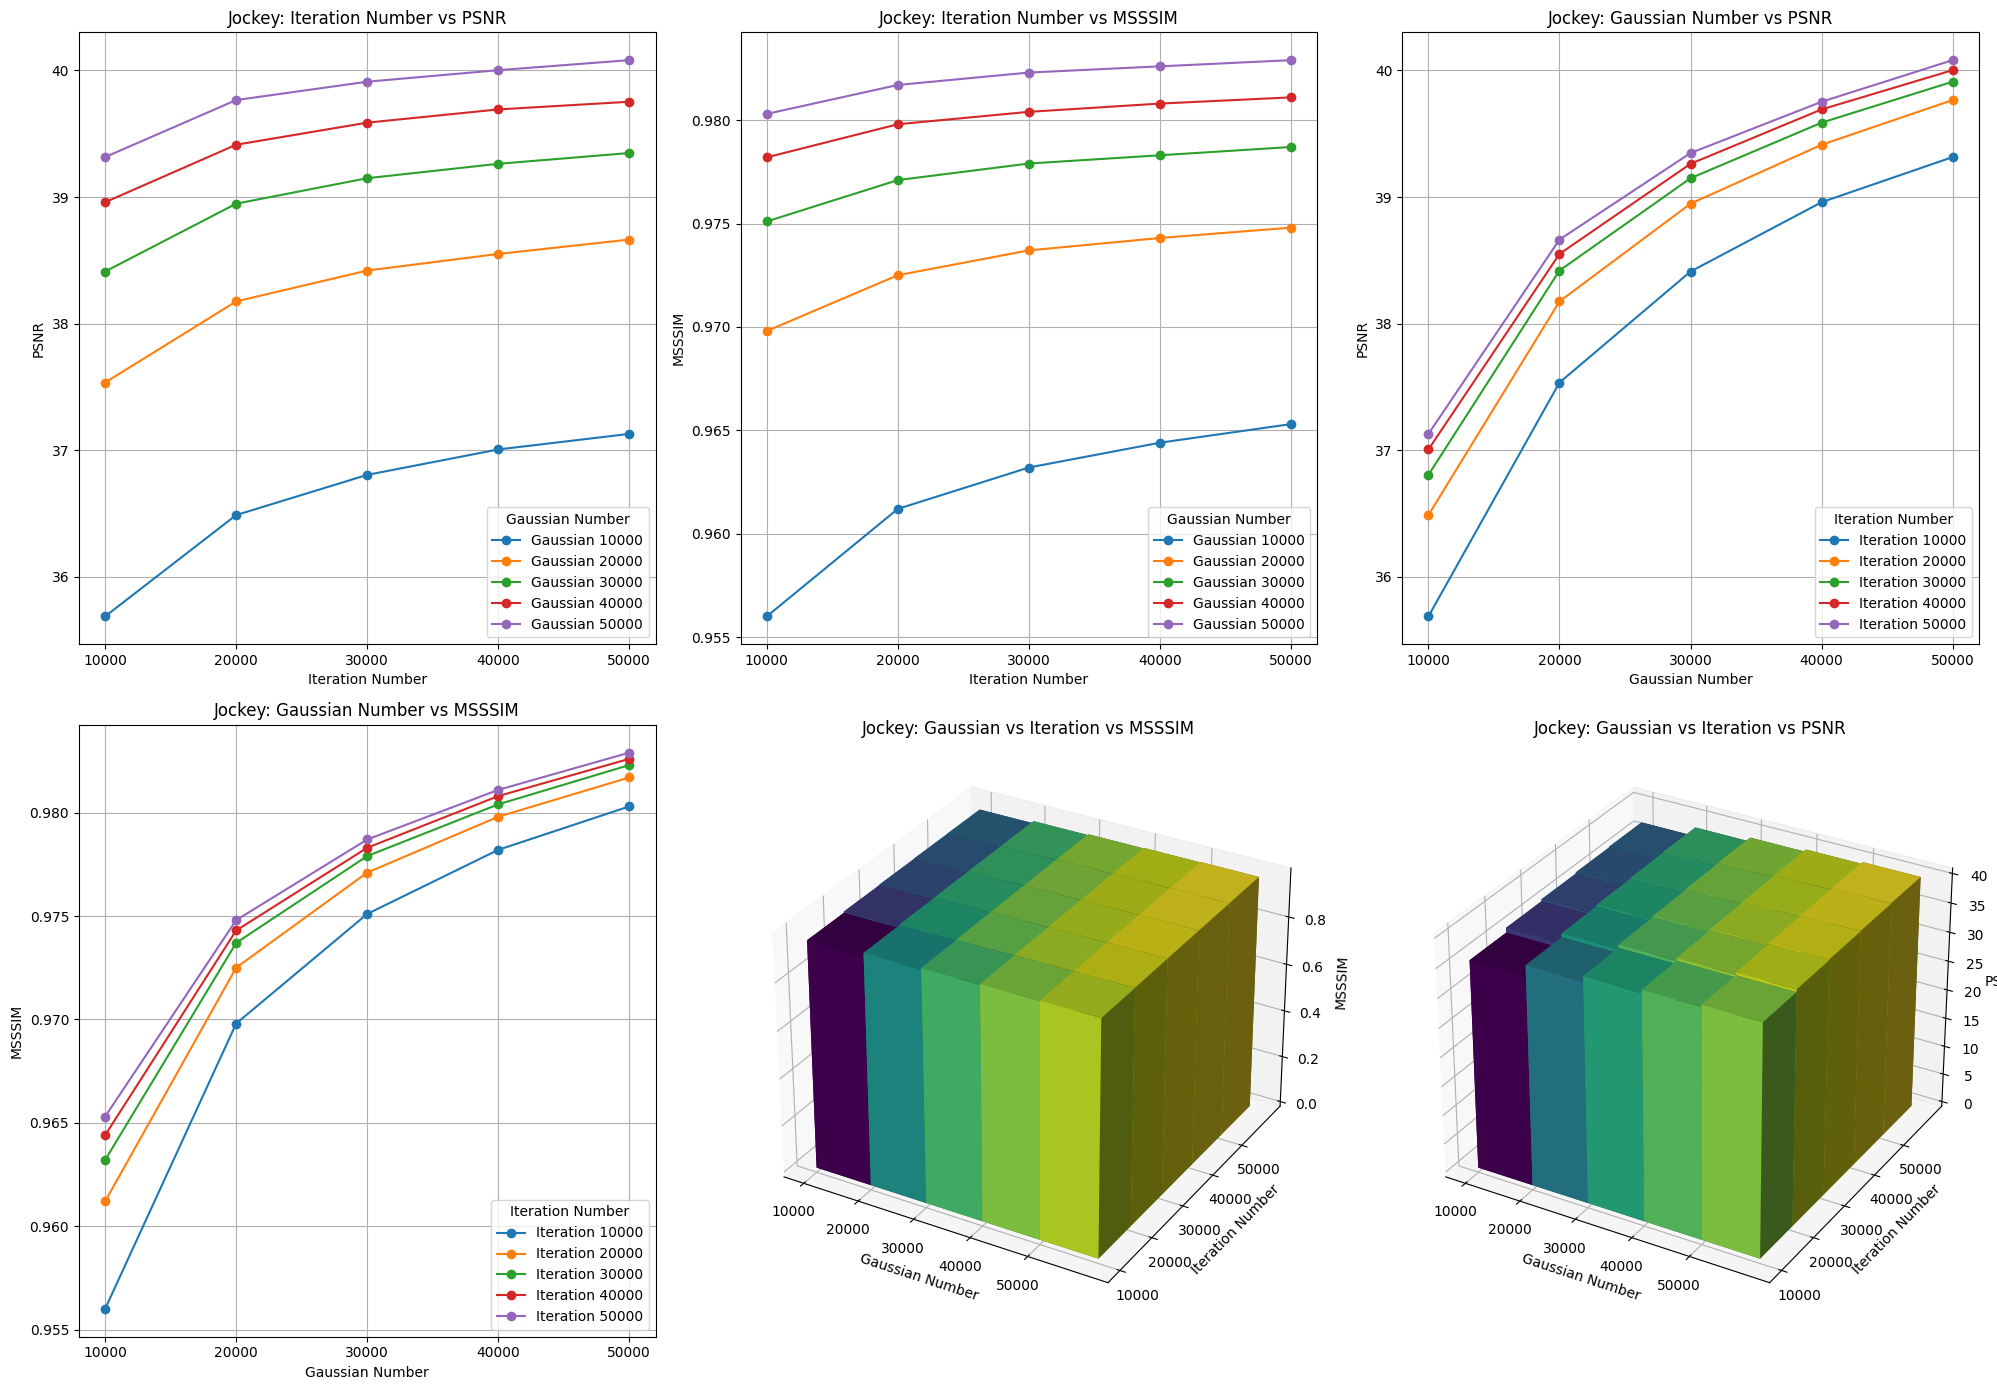

In [10]:
base_folder = '../result_I'  # Set this to the base folder path containing 'Beauty', 'Honeybee', 'Jockey'
save_directory = './img_I'  # Set the directory where you want to save the plots

# Create the save directory if it doesn't exist
os.makedirs(save_directory, exist_ok=True)

all_data = {}

for video_folder in ['Beauty', 'Honeybee', 'Jockey']:
    video_path = os.path.join(base_folder, video_folder)
    iteration_numbers, gaussian_numbers, psnr_values, msssim_values = gather_data(video_path)

    all_data[video_folder] = {
        'Iteration_numbers': iteration_numbers,
        'gaussian_numbers': gaussian_numbers,
        'psnr_values': psnr_values,
        'msssim_values': msssim_values,
    }

# Plot and save all data
plot_all_data(all_data, save_directory)